# 株価予測

- [Pythonで将来予測｜株価データを使ってpythonで機械学習をしてみよう【データ加工、データ整形、予測モデル作成、株価データの分類予測、予測精度の確認まで】](https://www.youtube.com/watch?v=asfWaVpCyl8&t=1250s)
- [機械学習で株価予測（TA-LibとLightGBMを使った学習モデル構築）](https://nehori.com/nikki/2020/01/26/post-15231/)
- [超簡単Pythonで株価予測（LightGBM 利用）機械学習](https://note.com/10mohi6/n/n4b1196fea816)
- [超簡単Pythonで株価予測（Optuna・LightGBM 利用）ハイパーパラメータ自動最適化](https://note.com/10mohi6/n/n46d1bb0267b7)
- [年利30%超え！！！！！LightGBMを用いたトヨタ株自動売買シミュレーション](https://qiita.com/kt38k/items/3c0ee4251475b6407007)
- [lightgbm.plot_importance](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html)

In [1]:
# 銘柄コード
MEIGARA_CODE = '9983.T'

In [2]:
# pandasのインポート
import pandas as pd

In [3]:
# データの読み込み
df = pd.read_csv('%s_wFeatures.csv' %MEIGARA_CODE)
# データフレームの表示
df

,Date,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
0,2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2952,2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2953,2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186
2954,2021-12-29,2973,2,66580.0,65010.0,66580.0,65670.0,412000.0,-470.0,0.0,...,66385.713028,71738.573945,64601.426055,73522.860917,62817.139083,-1429.120009,-1443.714025,14.594017,33.701537,36.406185


In [4]:
# 各カラムの詳細確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2956 non-null   object 
 1   weeks        2956 non-null   int64  
 2   weekday      2956 non-null   int64  
 3   High         2956 non-null   float64
 4   Low          2956 non-null   float64
 5   Open         2956 non-null   float64
 6   Close        2956 non-null   float64
 7   Volume       2956 non-null   float64
 8   delta_Close  2955 non-null   float64
 9   Up           2956 non-null   float64
 10  Close_ratio  2955 non-null   float64
 11  Body         2956 non-null   float64
 12  Force_Index  2956 non-null   float64
 13  sma3         2954 non-null   float64
 14  sma5         2952 non-null   float64
 15  sma25        2932 non-null   float64
 16  sma50        2907 non-null   float64
 17  sma75        2882 non-null   float64
 18  sma100       2857 non-null   float64
 19  upper1

In [5]:
# Dateのデータ型を'datetime'型へ変更
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2956 non-null   datetime64[ns]
 1   weeks        2956 non-null   int64         
 2   weekday      2956 non-null   int64         
 3   High         2956 non-null   float64       
 4   Low          2956 non-null   float64       
 5   Open         2956 non-null   float64       
 6   Close        2956 non-null   float64       
 7   Volume       2956 non-null   float64       
 8   delta_Close  2955 non-null   float64       
 9   Up           2956 non-null   float64       
 10  Close_ratio  2955 non-null   float64       
 11  Body         2956 non-null   float64       
 12  Force_Index  2956 non-null   float64       
 13  sma3         2954 non-null   float64       
 14  sma5         2952 non-null   float64       
 15  sma25        2932 non-null   float64       
 16  sma50 

In [6]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,17660.0,17410.0,17660.0,17460.0,373600.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,17290.0,16800.0,17210.0,16900.0,1002600.0,-560.0,0.0,-0.032073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,17000.0,16730.0,16960.0,16770.0,669800.0,-130.0,0.0,-0.007692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,16950.0,16400.0,16780.0,16690.0,581900.0,-80.0,1.0,-0.004770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,16950.0,16190.0,16780.0,16900.0,1891700.0,210.0,0.0,0.012582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,68410.0,67510.0,67750.0,67540.0,224500.0,-660.0,0.0,-0.009677,...,66754.594698,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297
2021-12-27,2973,0,67530.0,66260.0,67480.0,66360.0,352600.0,-1180.0,0.0,-0.017471,...,66608.572426,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259
2021-12-28,2973,1,66950.0,66100.0,66770.0,66140.0,349200.0,-220.0,0.0,-0.003315,...,66524.527382,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186


# 不要なデータを削除する

In [7]:
# 不要カラムの削除と並べ替え
df = df[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14',
         'Up']]
df.dropna()
df

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,NaN,200.0,6.523056e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-05,1,-0.032073,310.0,1.694394e+10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-06,2,-0.007692,190.0,1.123255e+10,17043.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-07,3,-0.004770,90.0,9.711911e+09,16786.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-08,4,0.012582,-120.0,3.196973e+10,16786.666667,16944.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


# 学習データと検証データと評価データに分割する

In [8]:
# 学習データを2017-01-01～2019-12-31の期間とし、df_trainに入力する
df_train = df['2017-01-01':'2019-12-31']
df_train

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,2,0.034903,-810.0,2.805625e+10,42593.333333,42934.0,42176.8,39832.2,37797.066667,37506.6,...,44959.964932,39393.635068,46351.547398,38002.052602,908.312425,1161.509897,-253.197472,57.503528,59.738228,0.0
2017-01-05,3,-0.016170,660.0,2.201051e+10,42570.000000,42728.0,42230.0,39957.4,37892.000000,37566.1,...,44991.796517,39468.203483,46372.694775,38087.305225,818.455320,1092.898982,-274.443662,49.806566,54.441182,0.0
2017-01-06,4,-0.067387,780.0,5.701806e+10,41866.666667,42018.0,42210.8,40025.8,37944.933333,37584.5,...,45034.754221,39386.845779,46446.731331,37974.868669,509.781459,976.275477,-466.494018,30.794361,39.123637,0.0
2017-01-10,1,-0.025932,-70.0,4.630806e+10,40333.333333,41224.0,42175.6,40073.6,37993.066667,37596.4,...,45148.362110,39202.837890,46634.743164,37716.456836,179.968246,817.014031,-637.045785,26.682157,35.286476,0.0
2017-01-11,2,-0.003360,150.0,2.104990e+10,38990.000000,40570.0,42099.6,40107.8,38052.400000,37612.0,...,45329.908864,38869.291136,46945.063297,37254.136703,-90.853709,635.440483,-726.294192,26.185650,34.822262,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1,0.002403,-60.0,1.347015e+10,66663.333333,66686.0,66042.4,66900.0,65825.466667,65219.8,...,68617.227559,63467.572441,69904.641339,62180.158661,86.865885,-94.308190,181.174075,55.411063,53.228697,1.0
2019-12-25,2,0.001648,-100.0,1.669494e+10,66733.333333,66654.0,66073.2,66971.8,65880.533333,65219.8,...,68667.912901,63478.487099,69965.269352,62181.130648,119.981604,-51.450231,171.431835,56.546193,53.919196,1.0
2019-12-26,3,0.005384,-420.0,1.620002e+10,66943.333333,66814.0,66112.8,67007.2,65923.600000,65236.5,...,68745.812085,63479.787915,70062.318128,62163.281872,173.277604,-6.504664,179.782268,60.270096,56.198323,0.0


In [9]:
# 検証データを2020-01-01～2020-12-31の期間とし、df_validに入力する
df_valid = df['2020-01-01':'2020-12-31']
df_valid

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,-0.030000,740.0,4.749556e+10,64640.000000,65600.0,65882.4,66770.4,65903.866667,65222.1,...,68765.433292,62999.366708,70206.949937,61557.850063,-270.788958,-46.951993,-223.836965,26.381133,33.591965,1.0
2020-01-07,1,0.003172,70.0,4.596378e+10,63766.666667,64878.0,65741.6,66650.0,65883.466667,65217.3,...,68777.263644,62705.936356,70295.095466,61188.104534,-449.456177,-127.452830,-322.003347,28.759223,35.027314,0.0
2020-01-08,2,-0.018498,380.0,5.178714e+10,62793.333333,63850.0,65558.4,66511.2,65855.066667,65205.0,...,68888.748594,62228.051406,70553.922892,60562.877108,-677.648942,-237.492052,-440.156890,23.717141,30.829323,1.0
2020-01-09,3,0.027062,-760.0,5.804710e+10,63030.000000,63428.0,65441.2,66417.6,65843.733333,65201.7,...,68810.009024,62072.390976,70494.413536,60387.986464,-714.692858,-332.932213,-381.760645,40.553102,41.644310,0.0
2020-01-10,4,-0.027760,1010.0,1.039262e+11,62610.000000,62826.0,65208.8,66297.4,65805.733333,65185.8,...,68694.245487,61723.354513,70436.968230,59980.631770,-876.767803,-441.699331,-435.068471,32.144341,35.369733,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3,0.018975,-1040.0,3.124910e+10,84886.666667,84630.0,84818.8,80374.2,75691.733333,72016.1,...,87748.675465,81888.924535,89213.613197,80423.986803,1094.310813,1528.618156,-434.307344,61.767794,61.178946,1.0
2020-12-25,4,0.004655,-390.0,1.786824e+10,85520.000000,84982.0,84941.6,80707.6,75965.200000,72300.3,...,87855.471267,82027.728733,89312.406900,80570.793100,1138.300861,1450.554697,-312.253837,64.201500,62.581820,1.0
2020-12-28,0,0.006719,-430.0,3.479476e+10,86380.000000,85576.0,85172.4,81037.2,76242.933333,72608.8,...,87734.956723,82609.843277,89016.235085,81328.564915,1206.061714,1401.656101,-195.594386,67.569085,64.580514,1.0


In [10]:
# 評価データを2021-01-01～2021-12-31の期間とし、df_testに入力する
df_test  = df['2021-01-01':'2021-12-31']
df_test

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0,-0.015356,2920.0,5.937370e+10,91443.333333,89510.0,86134.8,82125.6,77231.466667,73599.3,...,90660.630293,81608.969707,92923.545439,79346.054561,2117.177944,1651.969998,465.207946,72.619582,70.057776,0.0
2021-01-05,1,-0.020648,930.0,5.001545e+10,90896.666667,90080.0,86336.4,82467.2,77524.666667,73902.9,...,90935.474272,81737.325728,93235.011408,79437.788592,2076.261786,1736.828356,339.433430,60.263378,61.739314,0.0
2021-01-06,2,-0.024784,1680.0,5.497611e+10,89060.000000,90092.0,86377.2,82758.8,77802.933333,74182.2,...,90979.580323,81774.819677,93280.770485,79473.629515,1844.247567,1758.312198,85.935369,49.193850,53.671603,1.0
2021-01-07,3,0.015984,-400.0,6.114704e+10,88160.000000,89600.0,86408.8,83072.6,78102.133333,74469.4,...,91053.881080,81763.718920,93376.421620,79441.178380,1752.336170,1757.116992,-4.780822,55.037702,57.438730,1.0
2021-01-08,4,0.038257,-2110.0,8.875795e+10,89013.333333,89452.0,86590.4,83434.2,78451.733333,74785.6,...,91677.407702,81503.392298,94220.911553,78959.888447,1929.985803,1791.690754,138.295048,65.799216,64.910548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.009677,210.0,1.516273e+10,68013.333333,67790.0,69074.4,72226.8,73364.000000,73419.8,...,73714.010604,64434.789396,76033.815907,62114.984093,-1278.921872,-1499.570426,220.648554,42.801640,42.027297,0.0
2021-12-27,0,-0.017471,1120.0,2.339854e+10,67366.666667,67750.0,68778.0,72096.6,73236.133333,73345.5,...,73116.855149,64439.144851,75286.282723,62269.717277,-1330.690354,-1465.794412,135.104058,36.976001,38.456259,0.0
2021-12-28,1,-0.003315,630.0,2.309609e+10,66680.000000,67308.0,68458.8,71963.8,73106.133333,73275.6,...,72327.345236,64590.254764,74261.617853,62655.982147,-1373.635001,-1447.362530,73.727529,35.949707,37.811186,0.0


In [11]:
# 学習データを説明変数（X_train）と目的変数（y_train）に分ける
X_train = df_train[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_train = df_train[['Up']]

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2017-01-04        2     0.034903  -810.0  2.805625e+10  42593.333333  42934.0   
2017-01-05        3    -0.016170   660.0  2.201051e+10  42570.000000  42728.0   
2017-01-06        4    -0.067387   780.0  5.701806e+10  41866.666667  42018.0   
2017-01-10        1    -0.025932   -70.0  4.630806e+10  40333.333333  41224.0   
2017-01-11        2    -0.003360   150.0  2.104990e+10  38990.000000  40570.0   
...             ...          ...     ...           ...           ...      ...   
2019-12-24        1     0.002403   -60.0  1.347015e+10  66663.333333  66686.0   
2019-12-25        2     0.001648  -100.0  1.669494e+10  66733.333333  66654.0   
2019-12-26        3     0.005384  -420.0  1.620002e+10  66943.333333  66814.0   
2019-12-27        4    -0.020083  1070.0  3.354759e+10  66650.000000  66658.0   
2019-12-30        0    -0.01

In [12]:
# 検証データを説明変数（X_valid）と目的変数（y_valid）に分ける
X_valid = df_valid[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_valid = df_valid[['Up']]

# 検証データの説明変数と目的変数を確認
print(X_valid)
print(y_valid)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2020-01-06        0    -0.030000   740.0  4.749556e+10  64640.000000  65600.0   
2020-01-07        1     0.003172    70.0  4.596378e+10  63766.666667  64878.0   
2020-01-08        2    -0.018498   380.0  5.178714e+10  62793.333333  63850.0   
2020-01-09        3     0.027062  -760.0  5.804710e+10  63030.000000  63428.0   
2020-01-10        4    -0.027760  1010.0  1.039262e+11  62610.000000  62826.0   
...             ...          ...     ...           ...           ...      ...   
2020-12-24        3     0.018975 -1040.0  3.124910e+10  84886.666667  84630.0   
2020-12-25        4     0.004655  -390.0  1.786824e+10  85520.000000  84982.0   
2020-12-28        0     0.006719  -430.0  3.479476e+10  86380.000000  85576.0   
2020-12-29        1     0.044994 -3580.0  7.540862e+10  88010.000000  86854.0   
2020-12-30        2     0.01

In [13]:
# 評価データを説明変数（X_test）と目的変数（y_test）に分ける
X_test  = df_test[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_test  = df_test[['Up']]

# 評価データの説明変数と目的変数を確認
print(X_test)
print(y_test)

            weekday  Close_ratio    Body   Force_Index          sma3     sma5  \
Date                                                                            
2021-01-04        0    -0.015356  2920.0  5.937370e+10  91443.333333  89510.0   
2021-01-05        1    -0.020648   930.0  5.001545e+10  90896.666667  90080.0   
2021-01-06        2    -0.024784  1680.0  5.497611e+10  89060.000000  90092.0   
2021-01-07        3     0.015984  -400.0  6.114704e+10  88160.000000  89600.0   
2021-01-08        4     0.038257 -2110.0  8.875795e+10  89013.333333  89452.0   
...             ...          ...     ...           ...           ...      ...   
2021-12-24        4    -0.009677   210.0  1.516273e+10  68013.333333  67790.0   
2021-12-27        0    -0.017471  1120.0  2.339854e+10  67366.666667  67750.0   
2021-12-28        1    -0.003315   630.0  2.309609e+10  66680.000000  67308.0   
2021-12-29        2    -0.007106   910.0  2.705604e+10  66056.666667  66782.0   
2021-12-30        3    -0.00

In [14]:
# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

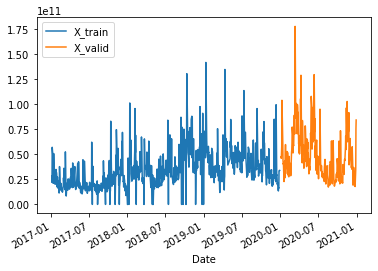

In [15]:
# 学習データと検証データの勢力指数（Force_Index）の折れ線グラフ作成
X_train['Force_Index'].plot(kind='line')
X_valid['Force_Index'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_valid'])

# グラフの表示
plt.show()

# 予測モデルを作成する

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import optuna
import csv

# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()

In [17]:
def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_valid)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_valid, pred_labels)
    return accuracy

In [18]:
def autotuning(seed=31):
    #tuner = optuna.create_study(direction="maximize")
    # "sampler"オプションで乱数シードを指定
    tuner = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
    tuner.optimize(objective, n_trials=100)

    clf = lgb.LGBMRegressor(**dict(tuner.best_trial.params.items()))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    fpr, tpr, thresholds = roc_curve(np.asarray(y_valid), y_pred)
    y_pred2 = clf.predict(X_test)
    fpr2, tpr2, thresholds2 = roc_curve(np.asarray(y_test), y_pred2)
    # 検証データおよびテストデータでの精度指標値をDictに
    metrics = {
        'seed': seed,
        # 検証データ
        'valid-f1': f1_score(y_valid, y_pred > 0.5, average='macro'),
        'valid-auc': auc(fpr, tpr),
        'valid-accuracy': accuracy_score(np.asarray(y_valid), np.round(y_pred)),
        'valid-precision': precision_score(np.asarray(y_valid), np.round(y_pred)),
        # 評価データ
        'test-f1': f1_score(y_test, y_pred2 > 0.5, average='macro'),
        'test-auc': auc(fpr2, tpr2),
        'test-accuracy': accuracy_score(np.asarray(y_test), np.round(y_pred2)),
        'test-precision': precision_score(np.asarray(y_test), np.round(y_pred2)),
    }
    print('accuracy_score: %s' %accuracy_score(y_valid, y_pred > 0.5))
    print('f1_score      : %s' %f1_score(y_valid, y_pred > 0.5, average='macro'))
    # Tupleとして戻り値に
    return (dict(tuner.best_trial.params.items()), metrics) 

In [19]:
import math

# 乱数シードを指定（from 素数を取得するワンライナー）
seeds = (lambda n:[x for x in range(2, n) if not 0 in map(lambda z: x%z, range(2, x))])(100)

In [20]:
# 各試行での情報を保存
listParams = []
listMetrics = []

for seed in seeds:
    print('### seed:%s ###' %seed)
    tunedparam, metrics = autotuning(seed)
    tunedparam['seed'] = metrics['seed']
    listParams.append(tunedparam)
    listMetrics.append(metrics)

# DataFrameからCSVファイルを生成
df_params = pd.DataFrame(listParams)
df_params.to_csv('predStockPrice-LightGBM-params.csv', encoding='utf-8', index=False, header=True, quotechar='"', quoting=csv.QUOTE_ALL)
df_metrics = pd.DataFrame(listMetrics)
df_metrics.to_csv('predStockPrice-LightGBM-metrics.csv', encoding='utf-8', index=False, header=True, quotechar='"', quoting=csv.QUOTE_ALL)

### seed:2 ###
[LightGBM] [Warning] lambda_l1 is set=2.3545012423276178e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3545012423276178e-07
[LightGBM] [Warning] feature_fraction is set=0.4253160413165383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4253160413165383
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.391653086584051e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.391653086584051e-05
[LightGBM] [Warning] bagging_fraction is set=0.6726575833211899, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6726575833211899
accuracy_score: 0.5247933884297521
f1_score      : 0.5243954541570537
### seed:3 ###
[LightGBM] [Warning] lambda_l1 is set=0.00019971296292211103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019971296292211103
[LightGBM] [Warning] feature_fraction is set=0.4529945414923755, cols

In [21]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seed             25 non-null     int64  
 1   valid-f1         25 non-null     float64
 2   valid-auc        25 non-null     float64
 3   valid-accuracy   25 non-null     float64
 4   valid-precision  25 non-null     float64
 5   test-f1          25 non-null     float64
 6   test-auc         25 non-null     float64
 7   test-accuracy    25 non-null     float64
 8   test-precision   25 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 1.9 KB


In [22]:
df_metrics.head()

,seed,valid-f1,valid-auc,valid-accuracy,valid-precision,test-f1,test-auc,test-accuracy,test-precision
0,2,0.524395,0.493423,0.524793,0.572650,0.510131,0.499092,0.510204,0.467153
1,3,0.537158,0.501687,0.537190,0.592593,0.518295,0.506185,0.518367,0.473282
2,5,0.508463,0.501343,0.516529,0.553191,0.514156,0.510723,0.514286,0.471014
3,7,0.483392,0.486088,0.483471,0.532710,0.475728,0.498386,0.481633,0.450000
4,11,0.516124,0.515944,0.516529,0.572816,0.503286,0.500538,0.526531,0.469136


In [23]:
result_acc = df_metrics['valid-accuracy'].to_list()
print('### valid ###')
print('max: %s' %max(result_acc))
print('min: %s' %min(result_acc))
print('ave: %s' %(sum(result_acc)/len(result_acc)))
result_acc = df_metrics['test-accuracy'].to_list()
print('### test  ###')
print('max: %s' %max(result_acc))
print('min: %s' %min(result_acc))
print('ave: %s' %(sum(result_acc)/len(result_acc)))

### valid ###
max: 0.5371900826446281
min: 0.4793388429752066
ave: 0.5072727272727272
### test  ###
max: 0.5346938775510204
min: 0.4816326530612245
ave: 0.5085714285714286


In [24]:
# valid-accuracy値で降順にソート
df_metrics.sort_values('valid-accuracy', ascending=False)

,seed,valid-f1,valid-auc,valid-accuracy,valid-precision,test-f1,test-auc,test-accuracy,test-precision
1,3,0.537158,0.501687,0.537190,0.592593,0.518295,0.506185,0.518367,0.473282
0,2,0.524395,0.493423,0.524793,0.572650,0.510131,0.499092,0.510204,0.467153
8,23,0.524785,0.496006,0.524793,0.576577,0.510196,0.499966,0.510204,0.466165
18,67,0.520530,0.503202,0.520661,0.575472,0.480719,0.495664,0.493878,0.431579
4,11,0.516124,0.515944,0.516529,0.572816,0.503286,0.500538,0.526531,0.469136
5,13,0.513530,0.505165,0.516529,0.582418,0.513071,0.490487,0.522449,0.470000
21,79,0.511314,0.494559,0.516529,0.555556,0.497121,0.487562,0.497959,0.458333
17,61,0.511314,0.506680,0.516529,0.588235,0.513618,0.527027,0.534694,0.481928
2,5,0.508463,0.501343,0.516529,0.553191,0.514156,0.510723,0.514286,0.471014
19,71,0.516455,0.512121,0.516529,0.570093,0.509804,0.509715,0.510204,0.464567


In [25]:
# test-accuracy値で降順にソート
df_metrics.sort_values('test-accuracy', ascending=False)

,seed,valid-f1,valid-auc,valid-accuracy,valid-precision,test-f1,test-auc,test-accuracy,test-precision
17,61,0.511314,0.506680,0.516529,0.588235,0.513618,0.527027,0.534694,0.481928
4,11,0.516124,0.515944,0.516529,0.572816,0.503286,0.500538,0.526531,0.469136
23,89,0.503827,0.484470,0.504132,0.551724,0.522417,0.514421,0.522449,0.477273
5,13,0.513530,0.505165,0.516529,0.582418,0.513071,0.490487,0.522449,0.470000
6,17,0.509043,0.495179,0.512397,0.553846,0.517394,0.523699,0.518367,0.475862
1,3,0.537158,0.501687,0.537190,0.592593,0.518295,0.506185,0.518367,0.473282
2,5,0.508463,0.501343,0.516529,0.553191,0.514156,0.510723,0.514286,0.471014
9,29,0.476442,0.484917,0.479339,0.532609,0.510337,0.527195,0.514286,0.464286
10,31,0.512363,0.477169,0.512397,0.562500,0.511027,0.512001,0.514286,0.464912
0,2,0.524395,0.493423,0.524793,0.572650,0.510131,0.499092,0.510204,0.467153


In [26]:
df_params.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lambda_l1          25 non-null     float64
 1   lambda_l2          25 non-null     float64
 2   num_leaves         25 non-null     int64  
 3   feature_fraction   25 non-null     float64
 4   bagging_fraction   25 non-null     float64
 5   bagging_freq       25 non-null     int64  
 6   min_child_samples  25 non-null     int64  
 7   seed               25 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 1.7 KB


In [27]:
df_params.head()

,lambda_l1,lambda_l2,num_leaves,feature_fraction,bagging_fraction,bagging_freq,min_child_samples,seed
0,2.354501e-07,1.391653e-05,217,0.425316,0.672658,2,96,2
1,1.997130e-04,8.456818e-08,178,0.452995,0.580874,4,86,3
2,1.155435e-07,3.547136e+00,75,0.891346,0.418654,5,53,5
3,3.807185e-04,1.061894e-08,250,0.553032,0.757662,6,100,7
4,7.810334e-03,3.987277e-07,24,0.942958,0.444509,3,45,11
